# Feature Selection 

# **First Way** :- information gain

## - Information gain calculates the reduction in entropy from the transformation of a dataset.It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

## When to use : Use Information Gain when you have a classification problem, and you want to select features that contribute the most to the decision-making process

Accuracy on the test set: 0.956140350877193
Selected Features: ['mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concave points']


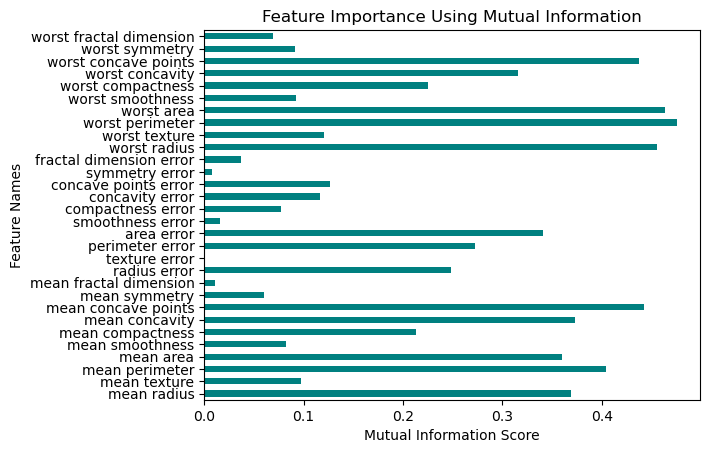

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load cancer dataset
cancer_data = load_breast_cancer()
X=cancer_data['data']
y=cancer_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature selection using mutual information
k_best = SelectKBest(score_func=mutual_info_classif, k=5)
X_train_mutual_info = k_best.fit_transform(X_train, y_train)
X_test_mutual_info = k_best.transform(X_test)

# Train a classifier on the selected features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_mutual_info, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_mutual_info)

# Evaluate the classifier performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Display selected features
selected_features = np.array(cancer_data.feature_names)[k_best.get_support()]
print("Selected Features:", selected_features)

# visualize result 
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, index=cancer_data.feature_names)
feat_importances.plot(kind='barh', color='teal')
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature Names")
plt.title("Feature Importance Using Mutual Information")
plt.show()


# Second Way :- chi square

## The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores.

## When to use :Chi-Square can be used when you have categorical features and want to assess the independence between features and the target variable.

In [39]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest ,chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# load cancer dataset
cancer_data = load_breast_cancer()
X=cancer_data['data']
y=cancer_data['target']

# Split data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature selection using chi-square
chi2_selector=SelectKBest(chi2,k=5)
Xtrain_chi2 = chi2_selector.fit_transform(Xtrain,ytrain)
Xtest_chi2 = chi2_selector.transform(Xtest)

# Train classifier on selected features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(Xtrain_chi2, y_train)

# Make predictions on the test data
ypred_chi2 = clf.predict(Xtest_chi2)

# Evaluate the Classifier Performance
print("with chi square feature selection ,This accuracy",accuracy_score(ytest,ypred_chi2))

# Display selected features
index = chi2_selector.get_support(indices=True)
selected_features = np.array(cancer_data.feature_names)[index]
print("Selected Features:", selected_features)


with chi square feature selection ,This accuracy 0.9649122807017544
Selected Features: ['mean perimeter' 'mean area' 'area error' 'worst perimeter' 'worst area']


# Third Way :- fisher score

## - Fisher score is one of the most widely used supervised feature selection methods. The algorithm we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

## When to use : When your target variable is categorical,it Can be used before training machine learning models to reduce computational cost and improve performance.

Top Selected Features: ['worst radius' 'mean concave points' 'mean smoothness' 'symmetry error'
 'mean concavity']


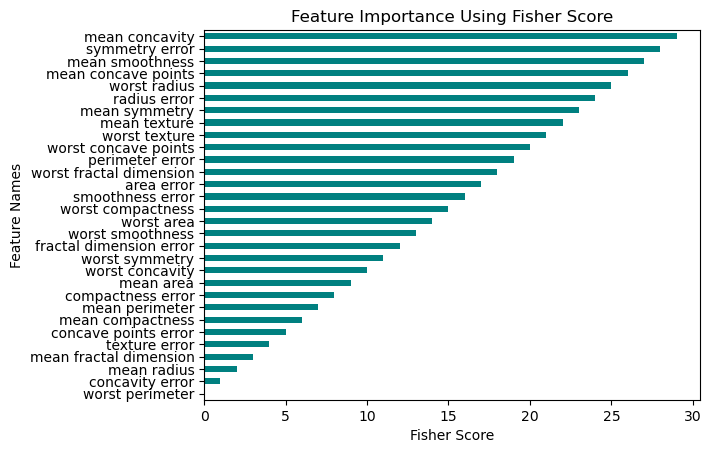

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from skfeature.function.similarity_based import fisher_score
from sklearn.model_selection import train_test_split

# Load cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data['data']
y = cancer_data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculating Fisher scores
ranks = fisher_score.fisher_score(X_train, y_train)

# Selecting top features based on Fisher scores
top_k = 5  # Choose the top 5 features
top_k_indices = np.argsort(ranks)[-top_k:]  # Indices of the top K features

selected_features = np.array(cancer_data.feature_names)[top_k_indices]
print("Top Selected Features:", selected_features)

# Plotting the Fisher scores for all features
feat_importances = pd.Series(ranks, index=cancer_data.feature_names)
feat_importances.sort_values().plot(kind='barh', color='teal')  # Sort for better visualization
plt.xlabel("Fisher Score")
plt.ylabel("Feature Names")
plt.title("Feature Importance Using Fisher Score")
plt.show()


# Fourth Way :- Varience Three Shold

##  It is an approach where all features are removed whose variance doesn’t meet the specific threshold. By default, this method removes features having zero variance.The assumption made using this method is higher variance features are likely to contain more information.


With VarianceThreshold feature selection, the accuracy: 0.9473684210526315


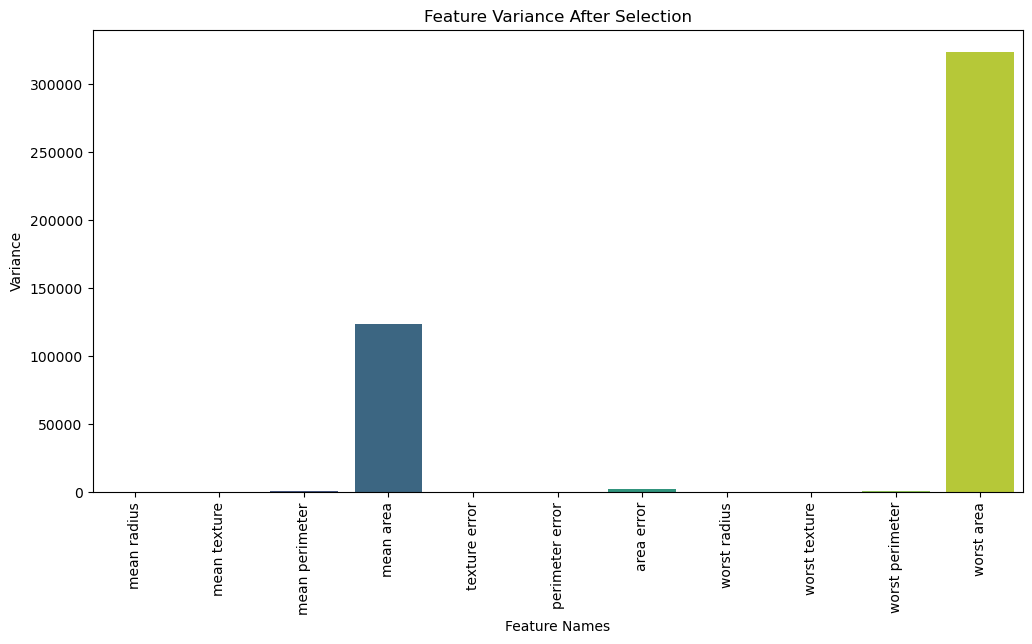

Selected Features after VarianceThreshold:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area' 'texture error'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
cancer_data = load_breast_cancer()
X = cancer_data['data']
y = cancer_data['target']
feature_names = np.array(cancer_data['feature_names'])  # Convert to NumPy array

# Apply VarianceThreshold before splitting
thresh = 0.2
Vth = VarianceThreshold(threshold=thresh)
X = Vth.fit_transform(X)  # Apply before splitting
selected_features = Vth.get_support()
selected_feature_names = feature_names[selected_features]

# Split dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier()
clf.fit(Xtrain, ytrain)
ypred_vth = clf.predict(Xtest)

print("With VarianceThreshold feature selection, the accuracy:", accuracy_score(ytest, ypred_vth))

# Visualization - Variance of each feature
variances = np.var(X, axis=0)  # Compute variance of each selected feature

plt.figure(figsize=(12, 6))
sns.barplot(x=selected_feature_names, y=variances, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Variance")
plt.title("Feature Variance After Selection")
plt.show()

# Show selected features
print("Selected Features after VarianceThreshold:\n", selected_feature_names)


#  Fifth Way :- Mean Absolute Difference (MAD)
## – This method is similar to variance threshold method but the difference is there is no square in MAD. This method calculates the mean absolute difference from the mean value.


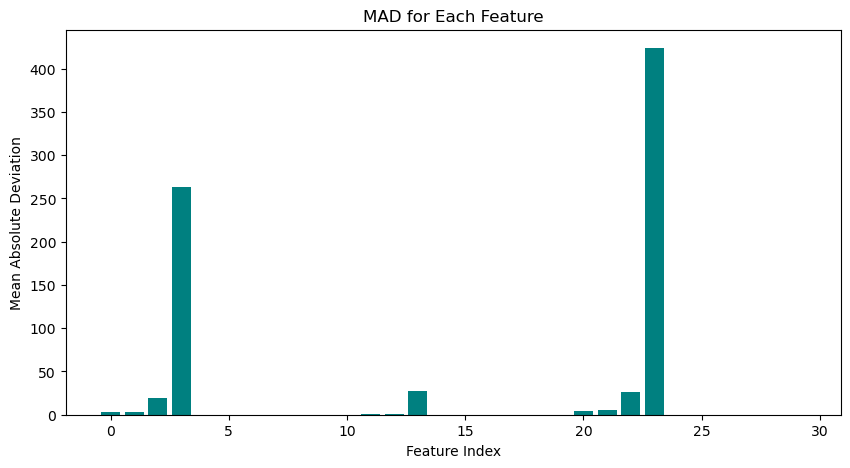

Mean Absolute Deviation for each feature:
 mean radius                  2.751888
mean texture                 3.384965
mean perimeter              19.032578
mean area                  263.483384
mean smoothness              0.011161
mean compactness             0.041105
mean concavity               0.062556
mean concave points          0.031460
mean symmetry                0.021146
mean fractal dimension       0.005306
radius error                 0.189285
texture error                0.408740
perimeter error              1.332525
area error                  27.196507
smoothness error             0.002123
compactness error            0.013138
concavity error              0.018608
concave points error         0.004528
symmetry error               0.005819
fractal dimension error      0.001664
worst radius                 3.789857
worst texture                4.911825
worst perimeter             26.465437
worst area                 423.879453
worst smoothness             0.017956
worst c

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data['data']
y = cancer_data['target']

# Create DataFrame with feature names
df = pd.DataFrame(X, columns=cancer_data['feature_names'])

# Calculate Mean Absolute Deviation (MAD) manually
mad_values = df.apply(lambda x: np.mean(np.abs(x - np.mean(x))), axis=0)

# Calculate MAD using NumPy
mean_abs_diff = np.sum(np.abs(X - np.mean(X, axis=0)), axis=0) / X.shape[0]

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(np.arange(X.shape[1]), mean_abs_diff, color='teal')
plt.xlabel("Feature Index")
plt.ylabel("Mean Absolute Deviation")
plt.title("MAD for Each Feature")
plt.show()

# (Optional) Print MAD values
print("Mean Absolute Deviation for each feature:\n", mad_values)


#  Six Way :- Correlation 

##  is a measure of the linear relationship between 2 or more variables. Through correlation.

Feature Importance by Correlation:
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0.

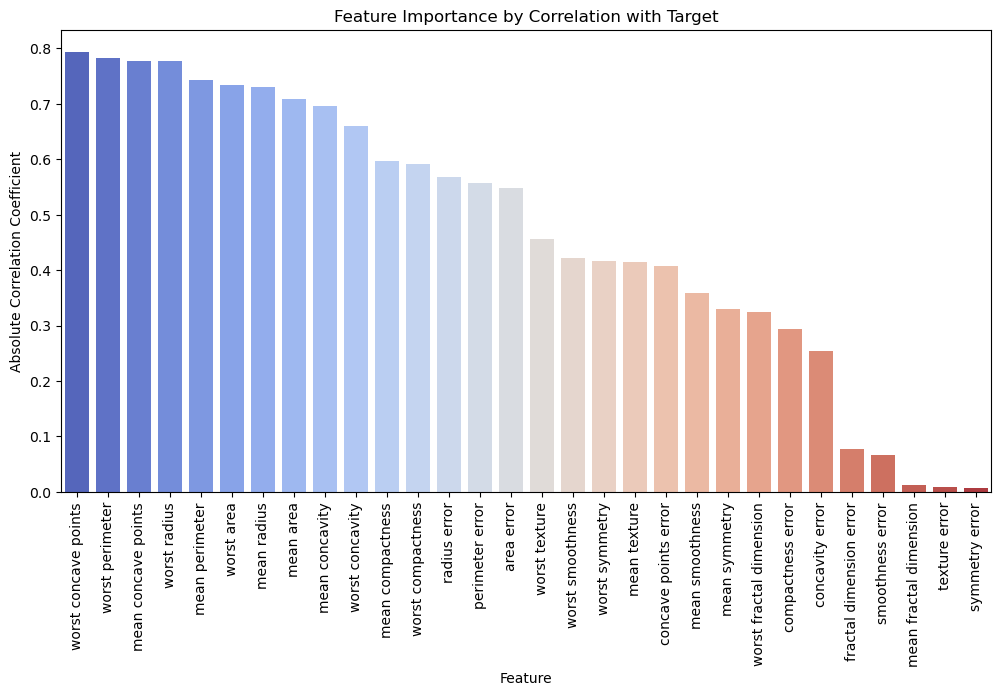

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load cancer dataset
cancer_data = load_breast_cancer()
X = cancer_data['data']
y = cancer_data['target']

# Convert to DataFrame and add target column
df = pd.DataFrame(X, columns=cancer_data['feature_names'])
df['target'] = y  # Add target column

# Compute correlation matrix
cor = df.corr()

# Plot Heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(cor, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
# plt.title("Feature Correlation Heatmap")
# plt.show()  # ✅ Fixed

# Calculate the absolute correlation coefficients between features and target
correlations = df.corr().abs()['target'].drop('target').sort_values(ascending=False)

# Display the feature importance based on correlation
print("Feature Importance by Correlation:")
print(correlations)

# Visualize the correlation coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm")
plt.title('Feature Importance by Correlation with Target')
plt.xlabel('Feature')
plt.ylabel('Absolute Correlation Coefficient')
plt.xticks(rotation=90)  # ✅ More readable rotation for feature names
plt.show()
